In [1]:
import pyAgrum as gum

## Creación de la Red Bayesiana

In [2]:
bn = gum.BayesNet()
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


In [3]:
cl = bn.add(gum.LabelizedVariable('cl', 'cloudy ?', 2)) #tamaño de la variable = 2
print(cl)

0


In [4]:
print(bn)

BN{nodes: 1, arcs: 0, domainSize: 2, dim: 2}


In [5]:
s,r,w = [bn.add(name, 2) for name in "srw"]
print(s,r,w)
print(bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 8}


In [6]:
bn.addArc(cl,s)

In [7]:
bn.addArc(cl,r)
bn.addArc(r,w)
bn.addArc(s,w)

In [8]:
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}


In [9]:
import pyAgrum.lib.notebook as gnb

In [11]:
bn

(gum::BayesNet<double>@000001B718FFB310) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

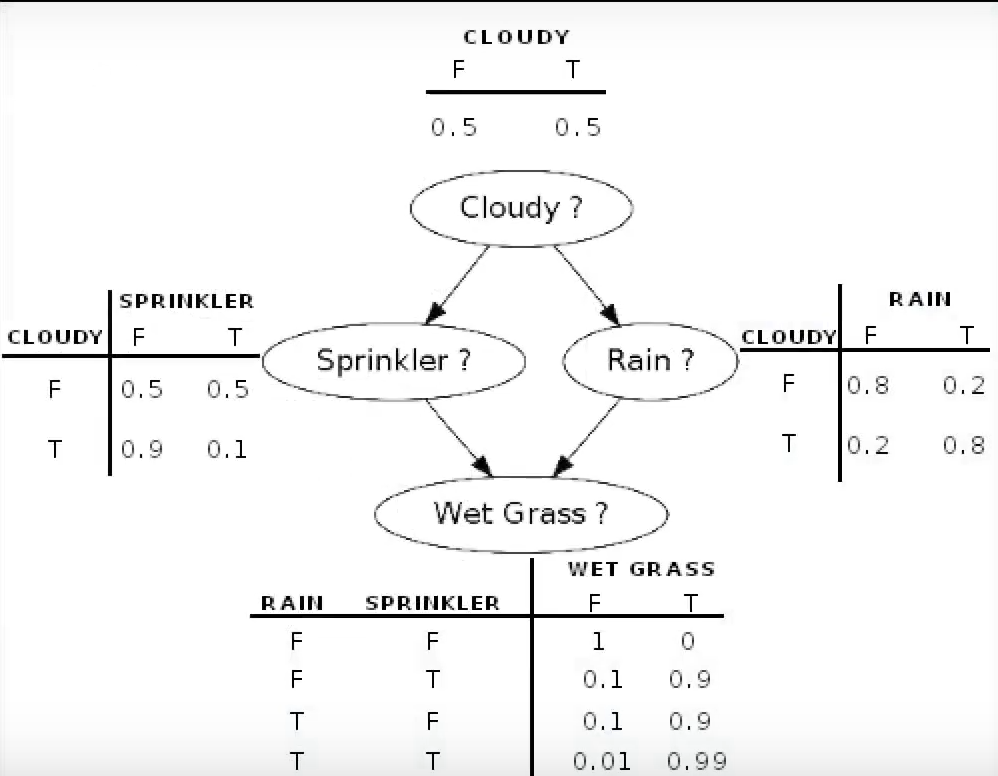

In [28]:
from IPython.display import Image
Image("img/picture.png")

In [12]:
bn.cpt(cl).fillWith([0.5,0.5])

(gum::Potential<double>@000001B718E4DFD0) 
  cl               |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

$P(S|cl=0)$ <br/>
$P(S|cl=1)$

In [16]:
bn.cpt(s)[:]=[[0.5,0.5],[0.9,0.1]] #cuando cl sea 0 y 1 en ese orden, forma implícita
print(bn.cpt(s)[0])

[0.9 0.1]


In [17]:
print(bn.cpt(s)[1])

[0.9 0.1]


In [18]:
bn.cpt(s)

(gum::Potential<double>@000001B718E4DA30) 
      ||  s                |
cl    ||0        |1        |
------||---------|---------|
0     || 0.5000  | 0.5000  |
1     || 0.9000  | 0.1000  |

In [23]:
bn.cpt(r)[{'cl':0}]=[0.8,0.2] #forma explícita, declarando la variable como diccionarios
bn.cpt(r)[{'cl':1}]=[0.2,0.8]
bn.cpt(r)

(gum::Potential<double>@000001B718E4DE50) 
      ||  r                |
cl    ||0        |1        |
------||---------|---------|
0     || 0.8000  | 0.2000  |
1     || 0.2000  | 0.8000  |

In [25]:
bn.cpt(w)[{'r': 0, 's': 0}] = [1, 0]
bn.cpt(w)[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt(w)

(gum::Potential<double>@000001B718E4DA70) 
             ||  w                |
r     |s     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.1000  | 0.9000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.0100  | 0.9900  |

In [26]:
ie = gum.LazyPropagation(bn)

$P(W)$

In [27]:
ie.makeInference()
print(ie.posterior(w))


  w                |
0        |1        |
---------|---------|
 0.3529  | 0.6471  |



$P(W|S=1,C=0)$ <br/>

## Variables
* H = Rain (r)
* Q = W
* E = S, CL

In [32]:
ie.setEvidence({'s':1, 'cl':0})
ie.makeInference()
ie.posterior(w)

(gum::Potential<double>@000001B718B5D110) 
  w                |
0        |1        |
---------|---------|
 0.0820  | 0.9180  |

$P(W|S=0,C=0)$

In [33]:
ie.setEvidence({'s':0, 'cl':0})
ie.makeInference()
ie.posterior(w)

(gum::Potential<double>@000001B718B5D0B0) 
  w                |
0        |1        |
---------|---------|
 0.8200  | 0.1800  |